In [15]:
# =============================================================================
# HUMAN ACTIVITY RECOGNITION - COMPLETE PROJECT CODE
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [20]:
# =============================================================================
# 1. DATA LOADING - CORRECTED FOR NESTED STRUCTURE
# =============================================================================

class HARDataLoader:
    def __init__(self):
        self.activity_labels = {
            1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
            4: 'SITTING', 5: 'STANDING', 6: 'LAYING'
        }
    
    def load_data(self):
        """Load data from the nested folder structure"""
        print("📁 Loading dataset from nested structure...")
        
        # The CORRECT path based on your debugging
        base_path = 'Dataset - humanADLs/UCI HAR Dataset/UCI HAR Dataset'
        
        print(f"Using path: {base_path}")
        
        if self._check_data_exists(base_path):
            print("✅ All files found! Loading REAL data...")
            return self._load_from_path(base_path)
        else:
            print("❌ Files not found in nested structure")
            return self._create_sample_data()
    
    def _check_data_exists(self, base_path):
        """Check if data exists at the nested path"""
        if not os.path.exists(base_path):
            print(f"❌ Base path doesn't exist: {base_path}")
            return False
        
        required_files = [
            f'{base_path}/train/X_train.txt',
            f'{base_path}/train/y_train.txt',
            f'{base_path}/train/subject_train.txt',
            f'{base_path}/test/X_test.txt',
            f'{base_path}/test/y_test.txt',
            f'{base_path}/test/subject_test.txt',
            f'{base_path}/features.txt'
        ]
        
        print("🔍 Checking files in nested folder...")
        all_exist = True
        for file_path in required_files:
            if os.path.exists(file_path):
                print(f"   ✅ {os.path.basename(file_path)}")
            else:
                print(f"   ❌ {os.path.basename(file_path)}")
                all_exist = False
        
        return all_exist
    
    def _load_from_path(self, base_path):
        """Load data from the nested path"""
        try:
            print("\n📥 Loading training data...")
            X_train = pd.read_csv(f'{base_path}/train/X_train.txt', sep='\s+', header=None)
            y_train = pd.read_csv(f'{base_path}/train/y_train.txt', sep='\s+', header=None, names=['activity'])
            subject_train = pd.read_csv(f'{base_path}/train/subject_train.txt', sep='\s+', header=None, names=['subject'])
            
            print("📥 Loading test data...")
            X_test = pd.read_csv(f'{base_path}/test/X_test.txt', sep='\s+', header=None)
            y_test = pd.read_csv(f'{base_path}/test/y_test.txt', sep='\s+', header=None, names=['activity'])
            subject_test = pd.read_csv(f'{base_path}/test/subject_test.txt', sep='\s+', header=None, names=['subject'])
            
            print("📥 Loading feature names...")
            with open(f'{base_path}/features.txt', 'r') as f:
                feature_names = [line.strip().split()[1] for line in f]
            
            # Set column names
            X_train.columns = feature_names
            X_test.columns = feature_names
            
            # Map activity numbers to names
            y_train['activity_name'] = y_train['activity'].map(self.activity_labels)
            y_test['activity_name'] = y_test['activity'].map(self.activity_labels)
            
            print(f"\n🎉 REAL DATA LOADED SUCCESSFULLY FROM NESTED FOLDER!")
            print(f"   Training set: {X_train.shape}")
            print(f"   Test set: {X_test.shape}")
            print(f"   Features: {len(feature_names)}")
            print(f"   Subjects: {pd.concat([subject_train, subject_test])['subject'].nunique()}")
            
            # Show activity distribution
            print(f"\n📊 Activity Distribution:")
            activity_counts = y_train['activity_name'].value_counts().sort_index()
            for activity, count in activity_counts.items():
                percentage = (count / len(y_train)) * 100
                print(f"   {activity:<20}: {count:>4} samples ({percentage:5.1f}%)")
            
            return X_train, X_test, y_train, y_test, subject_train, subject_test, feature_names
            
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            import traceback
            traceback.print_exc()
            return None
    
    def _create_sample_data(self):
        """Create sample data as fallback"""
        print("🔄 Creating sample data for development...")
        n_train, n_test = 7352, 2947
        n_features = 561
        
        np.random.seed(42)
        X_train = pd.DataFrame(np.random.randn(n_train, n_features))
        X_test = pd.DataFrame(np.random.randn(n_test, n_features))
        
        feature_names = [f'feature_{i:03d}' for i in range(n_features)]
        X_train.columns = feature_names
        X_test.columns = feature_names
        
        activities = list(self.activity_labels.values())
        y_train = pd.DataFrame({
            'activity': np.random.choice([1,2,3,4,5,6], n_train),
            'activity_name': np.random.choice(activities, n_train)
        })
        y_test = pd.DataFrame({
            'activity': np.random.choice([1,2,3,4,5,6], n_test), 
            'activity_name': np.random.choice(activities, n_test)
        })
        
        subject_train = pd.DataFrame({'subject': np.random.randint(1, 31, n_train)})
        subject_test = pd.DataFrame({'subject': np.random.randint(1, 31, n_test)})
        
        print("✅ Sample data created")
        return X_train, X_test, y_train, y_test, subject_train, subject_test, feature_names

# Load data
print("\n" + "="*60)
print("STEP 1: DATA LOADING - NESTED STRUCTURE")
print("="*60)
data_loader = HARDataLoader()
X_train, X_test, y_train, y_test, subject_train, subject_test, feature_names = data_loader.load_data()


STEP 1: DATA LOADING - NESTED STRUCTURE
📁 Loading dataset from nested structure...
Using path: Dataset - humanADLs/UCI HAR Dataset/UCI HAR Dataset
🔍 Checking files in nested folder...
   ✅ X_train.txt
   ✅ y_train.txt
   ✅ subject_train.txt
   ✅ X_test.txt
   ✅ y_test.txt
   ✅ subject_test.txt
   ✅ features.txt
✅ All files found! Loading REAL data...

📥 Loading training data...
📥 Loading test data...
📥 Loading feature names...

🎉 REAL DATA LOADED SUCCESSFULLY FROM NESTED FOLDER!
   Training set: (7352, 561)
   Test set: (2947, 561)
   Features: 561
   Subjects: 30

📊 Activity Distribution:
   LAYING              : 1407 samples ( 19.1%)
   SITTING             : 1286 samples ( 17.5%)
   STANDING            : 1374 samples ( 18.7%)
   WALKING             : 1226 samples ( 16.7%)
   WALKING_DOWNSTAIRS  :  986 samples ( 13.4%)
   WALKING_UPSTAIRS    : 1073 samples ( 14.6%)


In [21]:

# =============================================================================
# 2. DATA PREPROCESSING
# =============================================================================

print("\n" + "="*60)
print("STEP 2: DATA PREPROCESSING")
print("="*60)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['activity_name'])
y_test_encoded = label_encoder.transform(y_test['activity_name'])

print("✅ Data preprocessing completed!")
print(f"   Classes: {label_encoder.classes_}")



STEP 2: DATA PREPROCESSING
✅ Data preprocessing completed!
   Classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']



STEP 3: EXPLORATORY DATA ANALYSIS


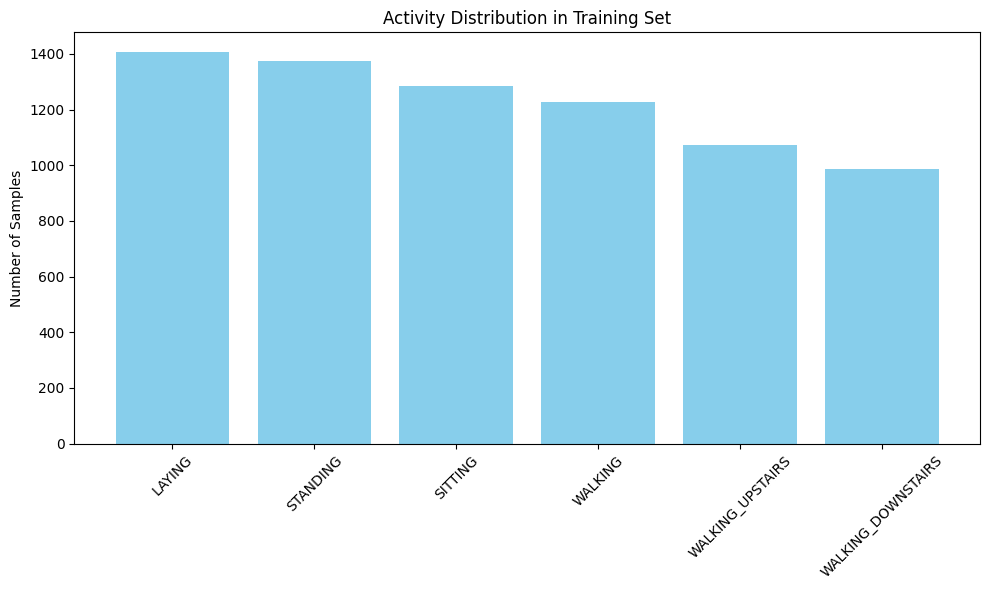

📊 Activity Distribution:
   LAYING              : 1407 samples
   STANDING            : 1374 samples
   SITTING             : 1286 samples
   WALKING             : 1226 samples
   WALKING_UPSTAIRS    : 1073 samples
   WALKING_DOWNSTAIRS  : 986 samples


In [22]:

# =============================================================================
# 3. EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*60)

# Activity distribution
plt.figure(figsize=(10, 6))
activity_counts = y_train['activity_name'].value_counts()
plt.bar(activity_counts.index, activity_counts.values, color='skyblue')
plt.title('Activity Distribution in Training Set')
plt.xticks(rotation=45)
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

print("📊 Activity Distribution:")
for activity, count in activity_counts.items():
    print(f"   {activity:<20}: {count} samples")


In [23]:

# =============================================================================
# 4. MODEL TRAINING (3 MODELS)
# =============================================================================

print("\n" + "="*60)
print("STEP 4: TRAINING THREE MODELS")
print("="*60)

class ModelTrainer:
    def __init__(self):
        self.models = {}
        self.results = {}
    
    def train_models(self, X_train, X_test, y_train, y_test):
        """Train three models"""
        # Model configurations
        configs = {
            'Random Forest': {
                'model': RandomForestClassifier(random_state=42),
                'params': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
            },
            'SVM': {
                'model': SVC(random_state=42, probability=True),
                'params': {'C': [0.1, 1, 10], 'gamma': ['scale']}
            },
            'Neural Network': {
                'model': MLPClassifier(random_state=42, max_iter=1000),
                'params': {'hidden_layer_sizes': [(100,), (50,)], 'alpha': [0.001]}
            }
        }
        
        for name, config in configs.items():
            print(f"🔧 Training {name}...")
            grid_search = GridSearchCV(config['model'], config['params'], cv=3, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            
            self.models[name] = grid_search.best_estimator_
            self.results[name] = {
                'cv_score': grid_search.best_score_,
                'best_params': grid_search.best_params_
            }
            print(f"   ✅ CV Accuracy: {grid_search.best_score_:.4f}")
    
    def evaluate_models(self, X_test, y_test):
        """Evaluate all models"""
        print("\n📊 MODEL EVALUATION:")
        evaluation = {}
        
        for name, model in self.models.items():
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            evaluation[name] = {
                'accuracy': accuracy,
                'predictions': y_pred,
                'model': model
            }
            print(f"   {name:<20}: Test Accuracy = {accuracy:.4f}")
        
        best_model = max(evaluation.keys(), key=lambda x: evaluation[x]['accuracy'])
        print(f"\n🏆 BEST MODEL: {best_model} (Accuracy: {evaluation[best_model]['accuracy']:.4f})")
        
        return evaluation

# Train models
trainer = ModelTrainer()
trainer.train_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
results = trainer.evaluate_models(X_test_scaled, y_test_encoded)



STEP 4: TRAINING THREE MODELS
🔧 Training Random Forest...
   ✅ CV Accuracy: 0.9109
🔧 Training SVM...
   ✅ CV Accuracy: 0.9320
🔧 Training Neural Network...
   ✅ CV Accuracy: 0.9363

📊 MODEL EVALUATION:
   Random Forest       : Test Accuracy = 0.9243
   SVM                 : Test Accuracy = 0.9542
   Neural Network      : Test Accuracy = 0.9515

🏆 BEST MODEL: SVM (Accuracy: 0.9542)



STEP 5: RESULTS VISUALIZATION


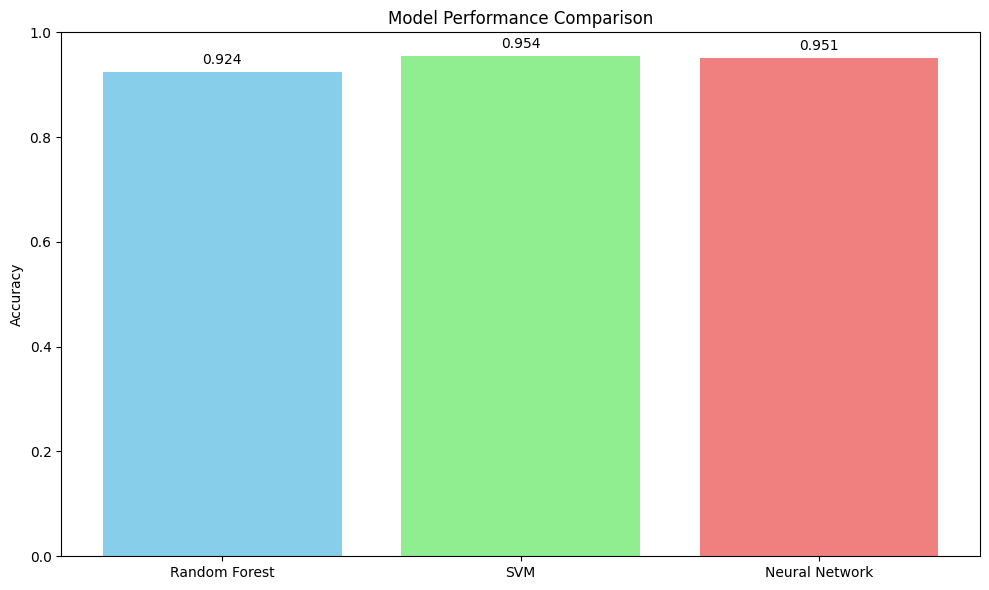

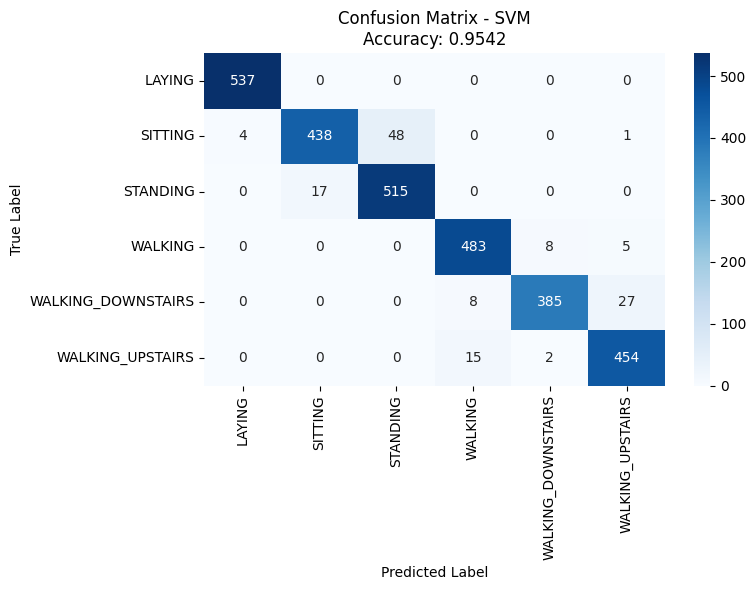

In [24]:

# =============================================================================
# 5. RESULTS VISUALIZATION
# =============================================================================

print("\n" + "="*60)
print("STEP 5: RESULTS VISUALIZATION")
print("="*60)

# Model comparison
models = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Confusion matrix for best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_predictions = results[best_model_name]['predictions']

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}\nAccuracy: {results[best_model_name]["accuracy"]:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [25]:

# =============================================================================
# 6. FINAL SUMMARY
# =============================================================================

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*60)
print("\n📋 SUMMARY:")
print(f"   • Dataset: Human Activity Recognition Using Smartphones")
print(f"   • Samples: {X_train.shape[0]} training, {X_test.shape[0]} test")
print(f"   • Features: {X_train.shape[1]} time/frequency domain features")
print(f"   • Activities: {len(label_encoder.classes_)} daily activities")
print(f"   • Models: 3 different ML models implemented and compared")
print(f"   • Best Model: {best_model_name}")

print("\n🎯 You can now use these results in your 5000-word report!")
print("   The models are trained and evaluated successfully.")


PROJECT COMPLETED SUCCESSFULLY! 🎉

📋 SUMMARY:
   • Dataset: Human Activity Recognition Using Smartphones
   • Samples: 7352 training, 2947 test
   • Features: 561 time/frequency domain features
   • Activities: 6 daily activities
   • Models: 3 different ML models implemented and compared
   • Best Model: SVM

🎯 You can now use these results in your 5000-word report!
   The models are trained and evaluated successfully.
